In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
#opposite

In [16]:
import category_encoders as ce

In [6]:
dataset=pd.read_excel(r'C:\Users\Sys\Downloads\bank-full.xlsx')

In [7]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
dataset.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [12]:
dataset.shape

(45211, 17)

In [13]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
dataset.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [16]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


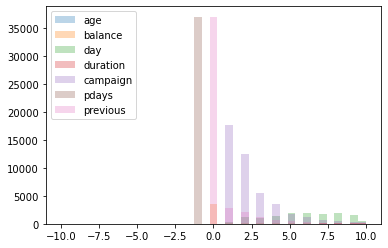

In [17]:
bins=np.linspace(-10,10,40)
plt.hist(dataset.age,bins,alpha=0.3,label='age')
plt.hist(dataset.balance,bins,alpha=0.3,label='balance')
plt.hist(dataset.day,bins,alpha=0.3,label='day')
plt.hist(dataset.duration,bins,alpha=0.3,label='duration')
plt.hist(dataset.campaign,bins,alpha=0.3,label='campaign')
plt.hist(dataset.pdays,bins,alpha=0.3,label='pdays')
plt.hist(dataset.previous,bins,alpha=0.3,label='previous')
plt.legend(loc='upper left')
plt.show()

In [18]:
duplicate_dataset=dataset[dataset.duplicated()]
duplicate_dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [19]:
def initial_eda(dataset):
    if isinstance(dataset, pd.DataFrame):
        total_na= dataset.isna().sum().sum()
        print("Total records", dataset.shape)
        print("Total number of NA: ", total_na)
        cols_name=dataset.columns
        dtype=dataset.dtypes
        duniq=dataset.nunique()
        na_val=dataset.isna().sum()
        print("Columns dataset","Datatype", "Unique dataset", "NA_vals")
        for i in range(len(dataset.columns)):
            print("%38s %10s %10s %10s"%(cols_name[i], dtype[i], duniq[i], na_val[i]) )
        else:
            print("error in code")

In [20]:
initial_eda(dataset)

Total records (45211, 17)
Total number of NA:  0
Columns dataset Datatype Unique dataset NA_vals
                                   age      int64         77          0
                                   job     object         12          0
                               marital     object          3          0
                             education     object          4          0
                               default     object          2          0
                               balance      int64       7168          0
                               housing     object          2          0
                                  loan     object          2          0
                               contact     object          3          0
                                   day      int64         31          0
                                 month     object         12          0
                              duration      int64       1573          0
                              campaign 

In [21]:
categorical=[i for i in dataset.columns if dataset[i].dtype == 'O']
print(categorical)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [22]:
dataset[categorical].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [23]:
for i in categorical:
    print(dataset[i].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

Text(0.5, 1.0, 'y Probability')

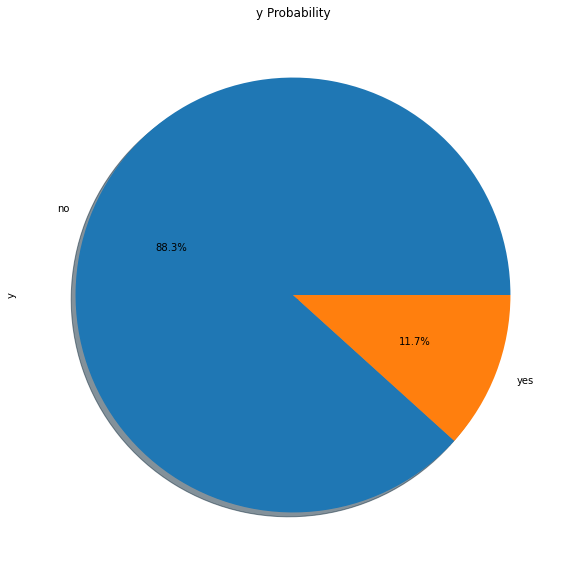

In [24]:
f, ax= plt.subplots(figsize=(10,10))
ax= dataset['y'].value_counts().plot.pie(explode=[0,0],autopct = '%1.1f%%', shadow=True)
ax.set_title('y Probability')

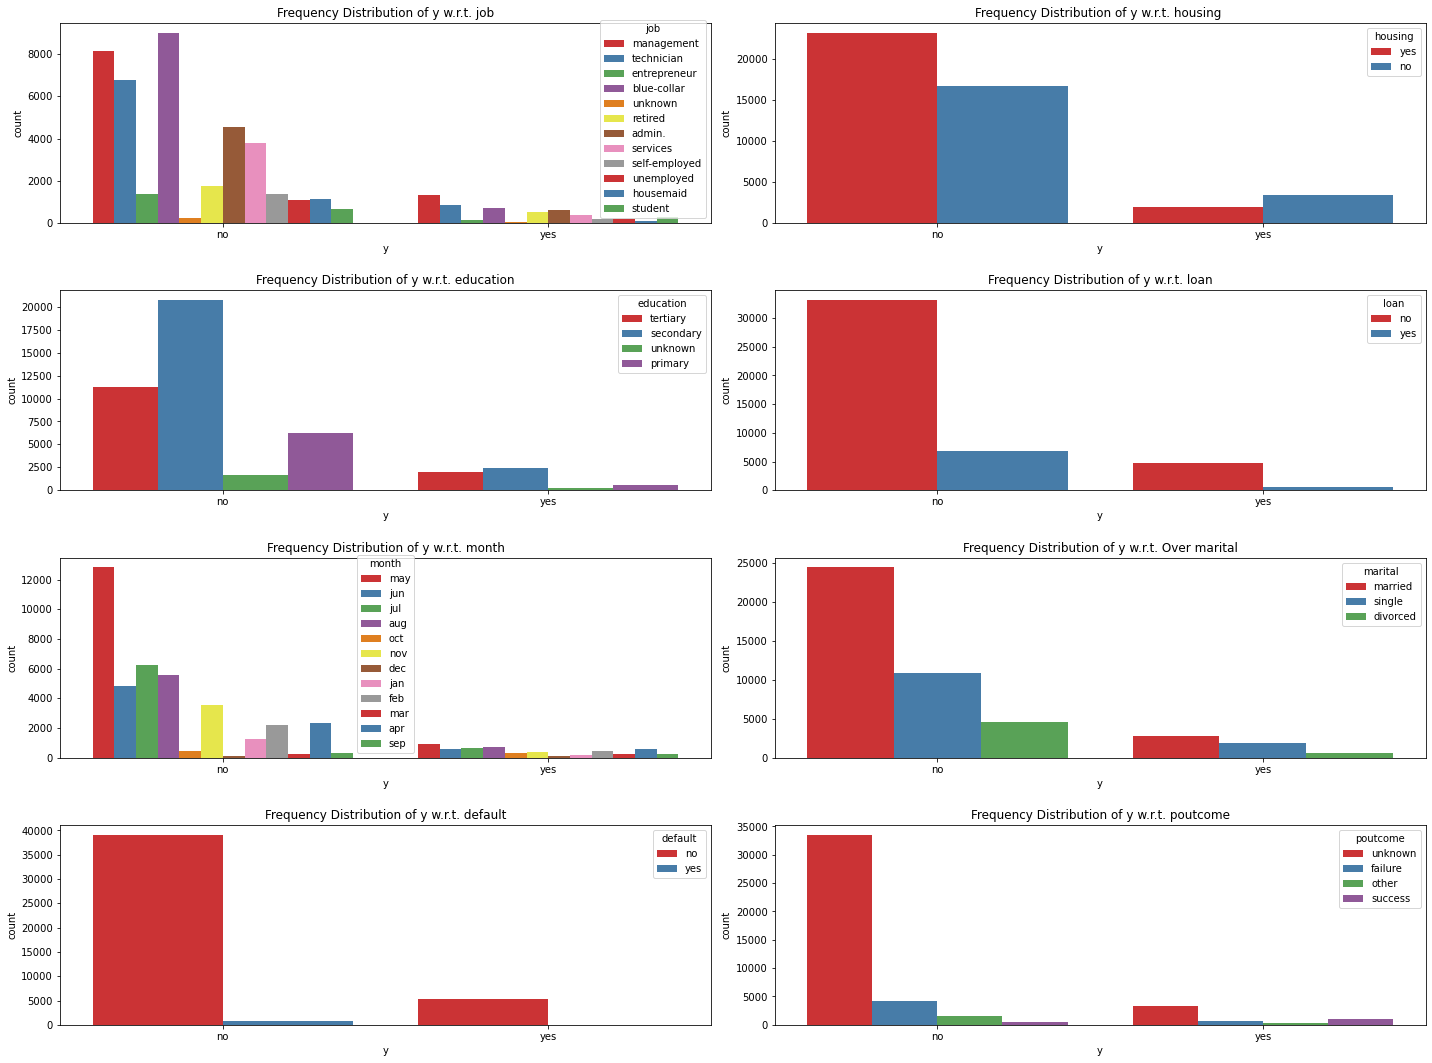

In [25]:


f, ax = plt.subplots(4,2, figsize=(20,15))

ax[0,0]=sns.countplot(x='y' , hue='job', data=dataset , ax = ax[0,0], palette='Set1')
ax[0,0].set_title("Frequency Distribution of y w.r.t. job")                      
                       
ax[1,0]=sns.countplot(x='y', hue= 'education' , data=dataset, ax=ax[1,0], palette='Set1')
ax[1,0].set_title("Frequency Distribution of y w.r.t. education")
                      
ax[0,1]=sns.countplot(x='y' , hue='housing', data=dataset , ax=ax[0,1], palette='Set1')
ax[0,1].set_title("Frequency Distribution of y w.r.t. housing ") 

                      
ax[1,1]=sns.countplot(x='y' , hue='loan', data=dataset , ax=ax[1,1], palette='Set1')
ax[1,1].set_title("Frequency Distribution of y w.r.t. loan")
                      
ax[2,0]=sns.countplot(x='y', hue='month', data=dataset , ax=ax[2,0], palette='Set1')
ax[2,0].set_title("Frequency Distribution of y w.r.t. month")
                      
                      
ax[2,1]=sns.countplot(x='y', hue='marital', data=dataset , ax=ax[2,1], palette='Set1')
ax[2,1].set_title("Frequency Distribution of y w.r.t. Over marital")
                      
                      
ax[3,0]=sns.countplot(x='y', hue='default', data=dataset , ax=ax[3,0], palette='Set1')
ax[3,0].set_title("Frequency Distribution of y w.r.t. default")
                      
                      
ax[3,1]=sns.countplot(x='y', hue='poutcome', data=dataset , ax=ax[3,1], palette='Set1')
ax[3,1].set_title("Frequency Distribution of y w.r.t. poutcome")
                      
f.tight_layout()  

In [3]:


sns.pairplot(dataset,hue='y')
plt.show()



NameError: name 'sns' is not defined

<AxesSubplot:>

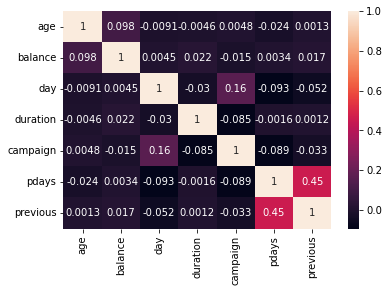

In [11]:
sns.heatmap(dataset.corr(), annot=True)

In [10]:
column_list=['poutcome','y']
x=dataset.drop(column_list,axis = 1)
y=dataset['y']

In [12]:
print(x.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')


In [13]:
print(y)

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object


In [14]:


X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)



(36168, 15) (9043, 15)


In [17]:
encoder=ce.OrdinalEncoder(cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)

In [18]:
cols=X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train,columns=[cols])
X_test = pd.DataFrame(X_test,columns=[cols])

In [19]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

C:\Users\Sys\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Sys\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [20]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [21]:
feature_score=pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [22]:
print(feature_score)

duration     0.294329
balance      0.111608
age          0.109356
day          0.100115
month        0.087518
pdays        0.061179
job          0.051567
campaign     0.040849
previous     0.030403
education    0.028974
housing      0.027071
contact      0.022276
marital      0.021868
loan         0.010894
default      0.001994
dtype: float64


In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7952
         yes       0.62      0.35      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



In [25]:
column_list=['default','poutcome','y']
x=dataset.drop(column_list,axis = 1)
y=dataset['y']

In [26]:
print(x.columns)

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')


In [27]:
print(y)

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object


In [28]:


X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)



(36168, 14) (9043, 14)


In [29]:
encoder=ce.OrdinalEncoder(cols=['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)

In [30]:
cols=X_train.columns
# X_train = pd.DataFrame(X_train, columns = X.columns)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train,columns=[cols])
X_test = pd.DataFrame(X_test,columns=[cols])

In [31]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

C:\Users\Sys\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Sys\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
score = accuracy_score(Y_test,y_pred)
print('randomforest classifier score: ',np.abs(score)*100)

randomforest classifier score:  89.38405396439235


In [34]:
dataset.replace({"y":{"no":0,"yes":1}},inplace=True)

In [35]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [36]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [37]:
column_list=['default','poutcome','y']
x=dataset.drop(column_list,axis = 1)
y=dataset['y']

In [38]:
print(x)

       age           job   marital  education  balance housing loan  \
0       58    management   married   tertiary     2143     yes   no   
1       44    technician    single  secondary       29     yes   no   
2       33  entrepreneur   married  secondary        2     yes  yes   
3       47   blue-collar   married    unknown     1506     yes   no   
4       33       unknown    single    unknown        1      no   no   
...    ...           ...       ...        ...      ...     ...  ...   
45206   51    technician   married   tertiary      825      no   no   
45207   71       retired  divorced    primary     1729      no   no   
45208   72       retired   married  secondary     5715      no   no   
45209   57   blue-collar   married  secondary      668      no   no   
45210   37  entrepreneur   married  secondary     2971      no   no   

         contact  day month  duration  campaign  pdays  previous  
0        unknown    5   may       261         1     -1         0  
1        unkn

In [39]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64


In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(36168, 14) (9043, 14)


In [41]:
encoder=ce.OrdinalEncoder(cols=['job', 'marital', 'education', 'housing', 'loan','contact', 'month'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)

In [42]:
print(X_train[0:5])

       age  job  marital  education  balance  housing  loan  contact  day  \
3344    41    1        1          1      849        1     1        1   15   
17965   49    2        1          1     1415        1     1        2   30   
18299   42    3        1          2     3842        2     1        2   31   
10221   37    4        2          3     -119        1     1        1   11   
32192   56    1        1          1     3498        2     1        2   15   

       month  duration  campaign  pdays  previous  
3344       1        72         1     -1         0  
17965      2       269         2     -1         0  
18299      2       130         4     -1         0  
10221      3       375        11     -1         0  
32192      4       264         2     -1         0  


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Sys\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Sys\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Sys\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\Sys\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\Sys\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Sys\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Sys\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\Sys\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
ConnectionResetErro

In [1]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [2]:
from sklearn import metrics

mae=metrics.mean_absolute_error(Y_test,pred)

print("Mean absolute error", mae)



NameError: name 'Y_test' is not defined